# Project 1: EDA with PySpark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* **Your Group Number: 2**
* **Each Team Members Name and Student ID: Urvashi Bhurase- 3059409, Ping-Jui Han- 3060359**

By submitting this group work, “I accept responsibility for my role in ensuring the integrity of the work submitted by the group in which I participated.”

[source](https://www.rochester.edu/college/honesty/instructors/pledge.html)

# Introduction

The purpose of this project is to help you apply what you learned in the previous lectures to a real-world dataset. At the end of it, you will have a self-contained notebook that you can brag about in job interviews. I've left some code cells and given some info on dataframe shape to help you check your work...

Now let's go tackle the PPP dataset and find some interesting trends using PySpark!

## Download PPP data

You can download the data from here (https://data.sba.gov/dataset/ppp-foia). We will use the first three files.

I have tried copying the link address and pasting it here (so no need to mount your Google Drive) - but the link address changes every few months, so instead we can download locally, drag to Google Drive, and use a shareable link.

In [ ]:
%cd "/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing"
%pwd

/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing


'/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing'

In [ ]:
# download the SBA data
# would be great but the link changes every quarter!

!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/2b55e11d-7e75-4bbb-b526-69a06c0c4731/download/public_150k_plus_230101.csv
!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/5f700a26-02f9-4d97-94a3-e3c2c43871eb/download/public_up_to_150k_1_230101.csv
!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/b785dfac-7d99-4bc0-9ab2-e87fe855174e/download/public_up_to_150k_2_230101.csv

Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/2b55e11d-7e75-4bbb-b526-69a06c0c4731/download/public_150k_plus_230101.csv
To: /content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/PPP/public_150k_plus_230101.csv
100% 452M/452M [00:03<00:00, 122MB/s]
Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/5f700a26-02f9-4d97-94a3-e3c2c43871eb/download/public_up_to_150k_1_230101.csv
To: /content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/PPP/public_up_to_150k_1_230101.csv
100% 414M/414M [00:05<00:00, 82.4MB/s]
Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/b785dfac-7d99-4bc0-9ab2-e87fe855174e/download/public_up_to_150k_2_230101.csv
To: /content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/PPP/pub

For some reason, I had to upgrade gdown to download a massive .csv file from my Google Drive... run this then try to download the files from your Google Drive!

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# download from Dave's google drive
!gdown 1JGW0DmOkR39tC8DiExRNbAoAsoy7JGwm
!gdown 1pIgGStXobZM9MkenPTduLfGwcJl9xwZh
!gdown 10C_r3jdN4iOb0KmHg7gk3FIS7DMNriaV

Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/2b55e11d-7e75-4bbb-b526-69a06c0c4731/download/public_150k_plus_230101.csv
To: /content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/public_150k_plus_230101.csv
100% 452M/452M [00:03<00:00, 145MB/s]
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id= https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/5f700a26-02f9-4d97-94a3-e3c2c43871eb/download/public_up_to_150k_1_230101.csv 

Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/b785dfac-7d99-4bc0-9ab2-e87fe855174e/download/public_up_to_150k_2_230101.csv
To: /content/drive/MyDrive/Colab_Notebooks/UCONN_

If you look left, you should be able to see the three big .csv files on the lefthand side.

## Download zipcode-level socioeconomic data
It's generally not known what census tract a business resides in, but the zipcode is almost always known. 

This repo (https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode) has zipcode-level census attributes. I have downloaded all of the files to our local runtime on the left.

In [ ]:
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/econ.txt
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/demo.txt
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/housing.txt
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/rural_urban.txt
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/social.txt

Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/econ.txt
To: /content/econ.txt
49.7MB [00:00, 65.8MB/s]
Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/demo.txt
To: /content/demo.txt
26.7MB [00:00, 78.0MB/s]
^C
Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/rural_urban.txt
To: /content/rural_urban.txt
923kB [00:00, 24.8MB/s]       
Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/social.txt
To: /content/social.txt
46.0MB [00:00, 82.9MB/s]


# Install Spark

In [ ]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

# findspark
import findspark
findspark.init()

# Start session

We start the builder pattern `SparkSession.builder` and then chain a configuration parameter that defined the application name.

Providing a useful `appName` helps you identify which programs are running on your Spark cluster.

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

spark = SparkSession.builder\
        .appName("Project1_EDA_with_PySpark")\
        .getOrCreate()

In [ ]:
# for concise script, we import all functions as F
import pyspark.sql.functions as F

# 🔴 Organize your folders (5 pts)

## (1) Create a folder on the local runtime called 'census' and copy all of the .txt files over to this folder
Like we did in class!

In [ ]:
# make a directory called census
%pwd
%cd '/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing'
%pwd
#%mkdir census


[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing'
/content


'/content'

In [ ]:
# move all of the txt files we just downloaded
%mv '/content/demo.txt' '/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/census'
%mv '/content/econ.txt' '/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/census'
%mv '/content/housing.txt' '/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/census'
%mv '/content/rural_urban.txt' '/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/census'
%mv '/content/social.txt' '/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/census'


## (2) Create a folder on the local runtime called 'PPP' and copy all of the .csv files over to this folder
Like we did in class! Use mv and not cp.

In [ ]:
# make a directory called PPP
%pwd
%cd '/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing'
%pwd
#%mkdir PPP

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing'
/content


'/content'

In [ ]:
# move all of the csv files we just downloaded

!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/2b55e11d-7e75-4bbb-b526-69a06c0c4731/download/public_150k_plus_230101.csv
!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/5f700a26-02f9-4d97-94a3-e3c2c43871eb/download/public_up_to_150k_1_230101.csv
!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/b785dfac-7d99-4bc0-9ab2-e87fe855174e/download/public_up_to_150k_2_230101.csv

Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/2b55e11d-7e75-4bbb-b526-69a06c0c4731/download/public_150k_plus_230101.csv
To: /content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/PPP/public_150k_plus_230101.csv
100% 452M/452M [00:02<00:00, 169MB/s]
Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/5f700a26-02f9-4d97-94a3-e3c2c43871eb/download/public_up_to_150k_1_230101.csv
To: /content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/PPP/public_up_to_150k_1_230101.csv
100% 414M/414M [00:02<00:00, 157MB/s]
Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/b785dfac-7d99-4bc0-9ab2-e87fe855174e/download/public_up_to_150k_2_230101.csv
To: /content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/PPP/publ

# 🔴 Clean the PPP data (10 points)

## (1) Append/concatenate all of the PPP csv files together
You should end up with ~2.76M rows and 53 columns if you did it right. You only need one line of code if you use the wildcard. Make sure you print the rows and column count to check your work or points off!

There are zipcode fields for the business and the banks! But be careful, there are null values!

In [ ]:
df1 = spark.read.csv("/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/PPP/public_150k_plus_230101.csv", header=True, inferSchema=True)
df2 = spark.read.csv("/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/PPP/public_up_to_150k_1_230101.csv", header=True, inferSchema=True)
df3 = spark.read.csv("/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/PPP/public_up_to_150k_2_230101.csv", header=True, inferSchema=True)

In [ ]:
df = df1.union(df2).union(df3)

In [ ]:
print(df.count(), len(df.columns))

2768531 53


In [ ]:
df.show()

+----------+------------+-------------+----------------+--------------------+--------------------+----------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+----------------+-----------------+------------+----------+-----+------------+---------+--------------------+--------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+------------+-----------+---------+-----------------+---------------+
|LoanNumber|DateApproved|SBAOfficeCode|ProcessingMethod|        Borrower

## (2) Clean the zipcode column for PPP files
There are some that are missing and there are some that have a long format (12345-6789).

We only want records where the `BorrowerZip`:
*  zip code exists (is non-null)
*  if it does exist, make return only the first 5 digits (https://www.datasciencemadesimple.com/extract-first-n-and-last-n-character-in-pyspark/)

Now answer:
* How many rows did you drop? 
* What percentage of the original data was returned? Do you think this is acceptable data quality?

In [ ]:
df_drop = df.dropna(subset=['BorrowerZip'])

In [ ]:
df = df_drop.withColumn("BorrowerZip", df_drop.BorrowerZip.substr(1,5))
df.show()
print(df.count(), len(df.columns))

+----------+------------+-------------+----------------+--------------------+--------------------+----------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+----------------+-----------------+------------+----------+-----+------------+---------+--------------------+--------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+----------+-----------+---------+-----------------+---------------+
|LoanNumber|DateApproved|SBAOfficeCode|ProcessingMethod|        BorrowerNa

# 🔴 Clean up ALL census files (10 points)
Try to use as little code as possible. You should end up with exactly 33120 rows and ~900 columns (depending on if you dropped the dirty zip code column.)

## (1) Read the files

In [ ]:
#converted text to csv 
#Didn't get time to try directly reading text files in pyspark
rural_urban = spark.read.csv("/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/census/rural_urban.csv", header=True, inferSchema=True)
print(rural_urban.count(), len(rural_urban.columns))
rural_urban.show()

33120 6
+-----+---------------------------------------+---------------------------------------------+---------------------------------------------+--------------------------------------------------------+--------------------------------------------------------+
|ZCTA5|urban_rural-population-total_population|urban_rural-population-urban_total_population|urban_rural-population-rural_total_population|urban_rural-percent-urban_population-of-total_population|urban_rural-percent-rural_population-of-total_population|
+-----+---------------------------------------+---------------------------------------------+---------------------------------------------+--------------------------------------------------------+--------------------------------------------------------+
|  601|                                  18570|                                        10679|                                         7891|                                                   0.575|                                  

In [ ]:
demo = spark.read.csv("/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/census/demo.csv", header=True, inferSchema=True)
print(demo.count(), len(demo.columns))
demo.show()

33120 153
+-----+---------------------------------------+--------------------------------------------+--------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+--------------------------------------------------

In [ ]:
econ = spark.read.csv("/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/census/econ.csv", header=True, inferSchema=True)
print(econ.count(), len(econ.columns))
econ.show()

33120 225
+-----+---------------------------------------------------------+------------------------------------------------------------------------+------------------------------------------------------------------------+---------------------------------------------------------------------------------+---------------------------------------------------------------------------------+------------------------------------------------------------------+------------------------------------------------------------------+--------------------------------------------------------------------+--------------------------------------------------------------------+----------------------------------------------------------------------+----------------------------------------------------------------------+----------------------------------------------------------------------------+----------------------------------------------------------------------------+-----------------------------------------------

In [ ]:
housing = spark.read.csv("/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/census/housing.csv", header=True, inferSchema=True)
print(housing.count(), len(housing.columns))
housing.show()

33120 255
+-----+---------------------------------------------------+--------------------------------------------------------------------------+-----------------------------------------------------------------------+------------------------------------------------------------------------+---------------------------------------------------------------------+--------------------------------------------------------------------------------+-----------------------------------------------------------------------------+----------------------------------------------------+--------------------------------------------------------------------+-----------------------------------------------------------------+--------------------------------------------------------------------+-----------------------------------------------------------------+------------------------------------------------------------+---------------------------------------------------------+----------------------------------------

In [ ]:
social = spark.read.csv("/content/drive/MyDrive/Colab_Notebooks/UCONN_Spring_2023/OPIM_5502_Big_Data_Analytics_with_Cloud_Computing/census/social.csv", header=True, inferSchema=True)
print(social.count(), len(social.columns))
social.show()

33120 252
+-----+-----------------------------------+-----------------------------------------------+----------------------------------------------------------------+---------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------+--------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------+-----------------------------------------------

## (2) Join files together

#convert zip integer to str
demo = demo.withColumn("d.ZCTA5", demo["ZCTA5"].cast("string"))Hint: everything except the zipcode column should be converted to float... check the schema to be sure...
* https://sparkbyexamples.com/pyspark/pyspark-join-two-or-multiple-dataframes/

In [ ]:
#joining all text files
census = demo.join(econ, ["ZCTA5"])
census = census.join(housing, ["ZCTA5"])
census = census.join(rural_urban, ["ZCTA5"])
census = census.join(social, ["ZCTA5"])

#convert zip integer to str
census = census.withColumn("ZCTA5", census["ZCTA5"].cast("string"))

#pad zeros to zip code
census = census.withColumn("ZCTA5", F.lpad(census.ZCTA5,5,"0"))

## (3) Check your work

To get full credit, you should have:
* (33120, ~900)
* All numeric columns (except for the clean zipcode column which should be a string - state why this column must be a string!)

In [ ]:
print(census.count(), len(census.columns))
census.show()

33120 887
+-----+---------------------------------------+--------------------------------------------+--------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+--------------------------------------------------

In [ ]:
#renamed ZCTA5 to BorrowerZip
census = census.withColumnRenamed("ZCTA5", "BorrowerZip")

# 🔴 Analysis Questions (70 points)

10 pts each.

## (1) Join the combined census data to the PPP data based on the zipcode 

Let's call this new file `df`. Use `df` for all future analysis questions.

In [ ]:
#census_PPP = census.join(df, ["census.ZCTA5"])
df = df.join(census, "BorrowerZip")

In [ ]:
print(df.count(), len(df.columns))
df.show()

KeyboardInterrupt: ignored

## (2) Identify the Top 10 states that received loans

Defined as the sum of funds per State across all records. You will need to recode this column because it is categorical data. Use the upper limit of each range and make sure it is NUMERIC data.

In [ ]:
Top_10_Borrower_State = (df
 .groupby("BorrowerState")\
 .agg(F.sum("InitialApprovalAmount").alias("Total_Funds"))\
 .orderBy("Total_Funds", ascending=False).show(10, False))


+-------------+---------------------+
|BorrowerState|Total_Funds          |
+-------------+---------------------+
|CA           |1.0341060171606998E11|
|NY           |4.155806662328881E10 |
|TX           |3.990825024395497E10 |
|FL           |2.8268587365874992E10|
|IL           |2.317317196175101E10 |
|PA           |2.1181372675260006E10|
|OH           |1.854379523376E10    |
|NJ           |1.7359210648285004E10|
|MI           |1.633751686088E10    |
|CO           |1.5025706937310001E10|
+-------------+---------------------+
only showing top 10 rows



## (3) Identify the Top 10 banks that loaned money
Defined as the sum of loaned funds per State across all records. Are many of the banks who loaned the most money in the same State? 

Again, make sure you are using the numeric version of this categorical column!

In [ ]:
Top_10_banks_that_loaned_money = (df
 .groupby("ServicingLenderName")\
 .agg(F.sum("InitialApprovalAmount").alias("Total_Funds"))\
 .orderBy("Total_Funds", ascending=False).show(10, False))

+-----------------------------------------+---------------------+
|ServicingLenderName                      |Total_Funds          |
+-----------------------------------------+---------------------+
|JPMorgan Chase Bank, National Association|3.1365484560644993E10|
|Bank of America, National Association    |2.4990090128639988E10|
|PNC Bank, National Association           |1.6794039683090994E10|
|Truist Bank                              |1.2645922801700006E10|
|Manufacturers and Traders Trust Company  |1.0878618121369999E10|
|Wells Fargo Bank, National Association   |9.681941316E9        |
|KeyBank National Association             |8.978054313339998E9  |
|The Huntington National Bank             |8.560863704109993E9  |
|Zions Bank, A Division of                |8.528023330469999E9  |
|Loan Source Incorporated                 |8.416130250100002E9  |
+-----------------------------------------+---------------------+
only showing top 10 rows



## (4) Which banks loaned the most money to businesses that were in the same State?
You will need to do a logical statement here! For example, given that a bank is headquarted in CT, how much money was loaned to CT businesses by this bank?

Generalize to all banks and businesses where this is true, then sort from high to low (return the top 10.)

In [ ]:
subset_df = df.filter(df.ServicingLenderState == df.BorrowerState)
print(subset_df.count(), len(subset_df.columns))
subset_df.show()
#It indeed looks like most of the local banks lend money in the same state

1029568 939
+-----------+----------+------------+-------------+----------------+--------------------+--------------------+------------+-------------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+-----------+-----------------+------------+----------+-----+------------+---------+----------+--------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+------------+-----------+---------+-----------------+---------------+---------------------------------------+----------------------------------------

In [ ]:
Banks_that_loaned_most_money_in_same_state = (subset_df
 .groupby("ServicingLenderName")\
 .agg(F.sum("InitialApprovalAmount").alias("Total_Funds"))\
 .orderBy("Total_Funds", ascending=False).show(10, False))

+---------------------------------------+-------------------+
|ServicingLenderName                    |Total_Funds        |
+---------------------------------------+-------------------+
|City National Bank                     |4.550559126800001E9|
|Manufacturers and Traders Trust Company|3.9842142241E9     |
|Frost Bank                             |3.59148313766E9    |
|The Huntington National Bank           |3.28600190202E9    |
|Bank of the West                       |2.955977913299999E9|
|MUFG Union Bank, National Association  |2.83184956172E9    |
|Signature Bank                         |2.4991916269888E9  |
|Harvest Small Business Finance, LLC    |2.390553644749999E9|
|Truist Bank                            |2.152015801185E9   |
|Pinnacle Bank                          |2.100570480369999E9|
+---------------------------------------+-------------------+
only showing top 10 rows



## (5) Which zipcodes received the most funding per capita?
This requires you to calculate the sum of funds per zipcode and then divide by the population per zipcode, then sort from high to low. 

Make sure you use the clean 5 digit zip code!

In [ ]:
funds_df = (df
    .groupby("BorrowerZip")
    .agg(F.sum("InitialApprovalAmount").alias("Total_Funds"))
    
)
print(funds_df.count(), len(funds_df.columns))
funds_df.show()

24425 2
+-----------+--------------------+
|BorrowerZip|         Total_Funds|
+-----------+--------------------+
|      02053|       2.046024428E7|
|      02090| 6.902033932000002E7|
|      03442|           3177923.0|
|      03904|       2.003066926E7|
|      06382|2.4032250970000003E7|
|      06518|       5.847642608E7|
|      07820|            936009.1|
|      08648| 8.267993107000002E7|
|      11563| 8.000096810999998E7|
|      11722|         4.3210974E7|
|      12529|           6826585.0|
|      13865|            482822.0|
|      14204|3.8843956010000005E7|
|      16504|           8600564.0|
|      17401|4.5311706510000005E7|
|      18333|           1147352.0|
|      18509|       2.828131346E7|
|      18634|          5200979.42|
|      18947|       2.678877059E7|
|      19095|       1.213465987E7|
+-----------+--------------------+
only showing top 20 rows



In [ ]:
population_df = (df
    .groupby("BorrowerZip")
    .agg(F.sum("urban_rural-population-total_population").alias("Total_Population"))
)
print(population_df.count(), len(population_df.columns))
population_df.show()

24425 2
+-----------+----------------+
|BorrowerZip|Total_Population|
+-----------+----------------+
|      02053|          471824|
|      02090|         1229424|
|      03442|            7455|
|      03904|          300417|
|      06382|         1851785|
|      06518|         8514792|
|      07820|             156|
|      08648|         4645872|
|      11563|         3218572|
|      11722|         2427213|
|      12529|           25731|
|      13865|           19113|
|      14204|          434550|
|      16504|          103932|
|      17401|         1414960|
|      18333|            1424|
|      18509|          597916|
|      18634|          176397|
|      18947|          357976|
|      19095|          155386|
+-----------+----------------+
only showing top 20 rows



In [ ]:
funds_capita_df = funds_df.join(population_df, "BorrowerZip")
print(funds_capita_df.count(), len(funds_capita_df.columns))
funds_capita_df.show()

24425 3
+-----------+--------------------+----------------+
|BorrowerZip|         Total_Funds|Total_Population|
+-----------+--------------------+----------------+
|      02053|       2.046024428E7|          471824|
|      02090| 6.902033932000002E7|         1229424|
|      03442|           3177923.0|            7455|
|      03904|       2.003066926E7|          300417|
|      06382|2.4032250970000003E7|         1851785|
|      06518|       5.847642608E7|         8514792|
|      07820|            936009.1|             156|
|      08648| 8.267993107000002E7|         4645872|
|      11563| 8.000096810999998E7|         3218572|
|      11722|         4.3210974E7|         2427213|
|      12529|           6826585.0|           25731|
|      13865|            482822.0|           19113|
|      14204|3.8843956010000005E7|          434550|
|      16504|           8600564.0|          103932|
|      17401|4.5311706510000005E7|         1414960|
|      18333|           1147352.0|            1424|
|   

In [ ]:
funds_capita_df = funds_capita_df.withColumn(
 "funds_per_capita",
 (
 F.col("Total_Funds")
 / F.col("Total_Population")
 ),
)
print(funds_capita_df.count(), len(funds_capita_df.columns))
funds_capita_df.show()

24425 4
+-----------+--------------------+----------------+------------------+
|BorrowerZip|         Total_Funds|Total_Population|  funds_per_capita|
+-----------+--------------------+----------------+------------------+
|      02053|       2.046024428E7|          471824| 43.36414485062227|
|      02090| 6.902033932000002E7|         1229424| 56.14038714064474|
|      03442|           3177923.0|            7455| 426.2807511737089|
|      03904|       2.003066926E7|          300417| 66.67621759088202|
|      06382|2.4032250970000003E7|         1851785|12.977884025413319|
|      06518|       5.847642608E7|         8514792| 6.867628249756423|
|      07820|            936009.1|             156| 6000.058333333333|
|      08648| 8.267993107000002E7|         4645872|17.796428973936436|
|      11563| 8.000096810999998E7|         3218572|24.856044267457737|
|      11722|         4.3210974E7|         2427213|17.802711999317737|
|      12529|           6826585.0|           25731|265.30585674866893

In [ ]:
sorted_funds_per_capita_df = funds_capita_df.orderBy(F.desc("funds_per_capita"))
print(sorted_funds_per_capita_df.count(), len(sorted_funds_per_capita_df.columns))
sorted_funds_per_capita_df.show()

24425 4
+-----------+--------------------+----------------+------------------+
|BorrowerZip|         Total_Funds|Total_Population|  funds_per_capita|
+-----------+--------------------+----------------+------------------+
|      38702|           1635200.0|               1|         1635200.0|
|      33122|1.4633250110000002E8|             280|522616.07535714295|
|      10173|           5209795.0|              10|          520979.5|
|      10165|       3.847859583E7|              94|409346.76414893614|
|      10103|           2304585.0|               6|          384097.5|
|      06856|           3260854.0|               9| 362317.1111111111|
|      63045| 7.735367553999999E7|             219| 353213.1303196347|
|      20701|4.1161578089999996E7|             122| 337389.9843442623|
|      10170|       3.947414224E7|             126| 313286.8431746032|
|      66118|           6457284.0|              21|307489.71428571426|
|      90095|           4979045.0|              18| 276613.6111111111

## (6) What is the top industry (NAICS codes) in the top 100 zip codes that received money?
Top 100 zip codes meaning the zip codes that borrowed the most money. I want the most common NAICS code per zip code. Show all 100 rows then sum per NAICS to describe overall trends.

This one is tricky!

In [ ]:
#create a subset for total money loaned per zipcode
zip_codes_that_received_money_df = (df
 .groupby("BorrowerZip")\
 .agg(F.sum("InitialApprovalAmount").alias("Total_Funds")) )

Top_100_zip_codes_that_received_money_df = zip_codes_that_received_money_df.orderBy(F.desc("Total_Funds")).limit(100)
Top_100_zip_codes_that_received_money_df.show()

+-----------+-------------------+
|BorrowerZip|        Total_Funds|
+-----------+-------------------+
|      10018|    1.49369205665E9|
|      10001|    1.34760677055E9|
|      10022|8.241799462999997E8|
|      10017|8.199811007200001E8|
|      10016|7.679431061400003E8|
|      92618|7.598575419900016E8|
|      10036|7.001283714299997E8|
|      60606|6.538845723900003E8|
|      10019|6.236285265699999E8|
|      11101|6.208269647600005E8|
|      80202|5.976323404700007E8|
|      92121|5.883022507100005E8|
|      92101|5.813262351500008E8|
|      10013|5.723515189900002E8|
|      94103|5.575284246900007E8|
|      94538|5.570915207700013E8|
|      80112| 5.53342848860001E8|
|      92660|5.430733972399997E8|
|      10010|5.408960279749999E8|
|      92626|5.318885017499996E8|
+-----------+-------------------+
only showing top 20 rows



In [ ]:
#joined the above subset with main dataframe df to get NAICSCodes for those respective zipcodes
left_join_df = Top_100_zip_codes_that_received_money_df.join(df, "BorrowerZip", "left")
left_join_df.select('BorrowerZip', 'NAICSCode', 'Total_Funds').show()

+-----------+---------+--------------------+
|BorrowerZip|NAICSCode|         Total_Funds|
+-----------+---------+--------------------+
|      22314|   541512|3.3078890580999976E8|
|      22314|   541110|3.3078890580999976E8|
|      22314|   236220|3.3078890580999976E8|
|      22314|   813319|3.3078890580999976E8|
|      22314|   561621|3.3078890580999976E8|
|      22314|   541618|3.3078890580999976E8|
|      22314|   541613|3.3078890580999976E8|
|      22314|   541611|3.3078890580999976E8|
|      22314|   541611|3.3078890580999976E8|
|      22314|   813920|3.3078890580999976E8|
|      22314|   541110|3.3078890580999976E8|
|      22314|   561439|3.3078890580999976E8|
|      22314|   813920|3.3078890580999976E8|
|      22314|   541511|3.3078890580999976E8|
|      22314|   238220|3.3078890580999976E8|
|      22314|   541611|3.3078890580999976E8|
|      22314|   813910|3.3078890580999976E8|
|      22314|   511210|3.3078890580999976E8|
|      22314|   813920|3.3078890580999976E8|
|      223

In [ ]:
#created a report that gives the most frequent NAICSCode for each zipcode

from pyspark.sql.functions import col, count, desc, row_number
from pyspark.sql.window import Window


# group by BorrowerZip and NAICSCode, and count the number of occurrences
group_by_NAICS = left_join_df.groupBy('BorrowerZip', 'NAICSCode').agg(count('*').alias('count'))

# define a window specification to partition by BorrowerZip and order by count in descending order
window_spec = Window.partitionBy('BorrowerZip').orderBy(desc('count'))

# assign a rank to each NAICS code within each BorrowerZip based on count
ranked = group_by_NAICS.withColumn('rank', row_number().over(window_spec))

# select only the rows with rank == 1, which correspond to the most frequent NAICS code for each BorrowerZip
Most_frequent_NAICS_df = ranked.filter(col('rank') == 1).select('BorrowerZip', 'NAICSCode', 'count')

# show the result

print(Most_frequent_NAICS_df.count(), len(Most_frequent_NAICS_df.columns))
Most_frequent_NAICS_df.show()

#For some of the zip codes the NAICSCode data was null in majority due to which for such zipcodes the most frequent NAICS code was reported to be null.
#This can be taken care off in two ways removing the null values and getting addition zipcodes in the list, taking second most frequent NAICSCode for those zip codes
#Couldn't code any of the two above mentioned ways due to lack of time
#Hence kept the null values as it is.


100 3
+-----------+---------+-----+
|BorrowerZip|NAICSCode|count|
+-----------+---------+-----+
|      22314|   722511|   68|
|      80301|   722511|   89|
|      85251|   812112|  197|
|      94107|   485310|  136|
|      60173|   721110|   29|
|      10012|   722511|  181|
|      94104|   541110|  280|
|      48083|   541511|   21|
|      10010|   722511|   68|
|      60654|   722511|  112|
|      91311|   713940|   90|
|      75024|   722511|   48|
|      91761|   484110|   65|
|      96819|   238220|   26|
|      94612|   541110|  236|
|      92612|   541110|  185|
|      90058|   424330|  207|
|      94520|   722511|  100|
|      33309|   541110|   19|
|      60606|   541110|  164|
+-----------+---------+-----+
only showing top 20 rows



In [ ]:
#Side code to cross check the data obtained 
#please ignore!!!
cross_check_df = df.filter((col('BorrowerZip') == 22314) & (col('NAICSCode') == 813920))
print(cross_check_df.count(), len(cross_check_df.columns))
cross_check_df.show()

KeyboardInterrupt: ignored

## (7) What are the socioeconomic characteristics of the top 100 zip codes? How do they relate to loan amounts?

Select two census variables that look interesting to you. 

Create histograms or scatterplots of those interesting socioeconomic variables with data from the PPP. Make them beautiful and describe what you see.

Don't just pick random variables - try to find an interesting story to tell with data and motivate WHY you picked this column!

In [ ]:
# create the sum of population_with_kids within zipcode
population_with_kids_df = (df
    .groupby("BorrowerZip")
    .agg(F.sum("employment_status-population_own_children_of_the_householder_6_to_17_years").alias("population_with_kids"))
    
)
print(population_with_kids_df.count(), len(population_with_kids_df.columns))
population_with_kids_df.show()


24425 2
+-----------+--------------------+
|BorrowerZip|population_with_kids|
+-----------+--------------------+
|      02053|               84545|
|      02090|              282828|
|      03442|                1155|
|      03904|               27729|
|      06382|              218085|
|      06518|              721149|
|      07820|                   0|
|      08648|              629568|
|      11563|              460506|
|      11722|              364803|
|      12529|                2961|
|      13865|                2574|
|      14204|               58650|
|      16504|               13176|
|      17401|              291040|
|      18333|                  58|
|      18509|               77132|
|      18634|               22035|
|      18947|               55100|
|      19095|               20548|
+-----------+--------------------+
only showing top 20 rows



In [ ]:
# create the sum of population_no_kids within zipcode
population_no_kids_df = (df
    .groupby("BorrowerZip")
    .agg(F.sum("households_by_type-households-nonfamily_households").alias("population_no_kids"))
    
)
print(population_no_kids_df.count(), len(population_no_kids_df.columns))
population_no_kids_df.show()

24425 2
+-----------+------------------+
|BorrowerZip|population_no_kids|
+-----------+------------------+
|      02053|             43956|
|      02090|            114576|
|      03442|               860|
|      03904|             48633|
|      06382|            190495|
|      06518|           1320462|
|      07820|               136|
|      08648|            577584|
|      11563|            357272|
|      11722|            176778|
|      12529|              3456|
|      13865|              1863|
|      14204|            103500|
|      16504|             16758|
|      17401|            223360|
|      18333|               224|
|      18509|             88220|
|      18634|             29952|
|      18947|             34858|
|      19095|             30932|
+-----------+------------------+
only showing top 20 rows



In [ ]:
#join them
Final_population_df = population_with_kids_df.join(population_no_kids_df, "BorrowerZip")
df_final = funds_df .join(Final_population_df, "BorrowerZip")
print(df_final.count(), len(df_final.columns))
df_final.show()


24425 4
+-----------+--------------------+--------------------+------------------+
|BorrowerZip|         Total_Funds|population_with_kids|population_no_kids|
+-----------+--------------------+--------------------+------------------+
|      02053|       2.046024428E7|               84545|             43956|
|      02090| 6.902033932000002E7|              282828|            114576|
|      03442|           3177923.0|                1155|               860|
|      03904|       2.003066926E7|               27729|             48633|
|      06382|2.4032250970000003E7|              218085|            190495|
|      06518|       5.847642608E7|              721149|           1320462|
|      07820|            936009.1|                   0|               136|
|      08648| 8.267993107000002E7|              629568|            577584|
|      11563| 8.000096810999998E7|              460506|            357272|
|      11722|         4.3210974E7|              364803|            176778|
|      12529|    

In [ ]:
#to pandas 
import matplotlib.pyplot as plt

df_final = df_final.toPandas() # convert to pandas
df_final.head() # look at first few rows

BorrowerZip  Total_Funds  population_with_kids  population_no_kids
0       02053  20460244.28                 84545               43956
1       02090  69020339.32                282828              114576
2       03442   3177923.00                  1155                 860
3       03904  20030669.26                 27729               48633
4       06382  24032250.97                218085              190495

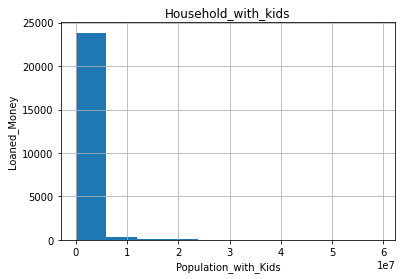

In [ ]:
#generate population_with_kids plot 

df_final['population_with_kids'].hist()
plt.title('Household_with_kids')
plt.xlabel('Population_with_Kids')
plt.ylabel('Loaned_Money')
plt.show()

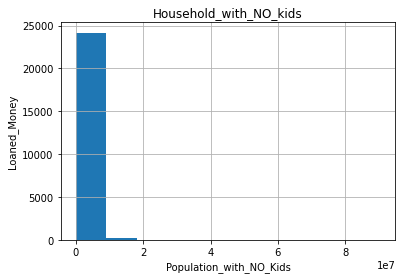

In [ ]:
#generate population_no_kids plot 

df_final['population_no_kids'].hist()
plt.title('Household_with_NO_kids')
plt.xlabel('Population_with_NO_Kids')
plt.ylabel('Loaned_Money')
plt.show()

## (8) Optional extra credit for +10 points. What are the Top 10 zipcodes that had the highest per capita amount of loans going to Women-Owned businesses?

This column is called `Gender` in the `PPP` data.

* What State are these zipcodes in? 
* Comment on if they have anything in common? 

In [ ]:
#create a subset with only women owned businesses

woman_owned_df = df.filter( df.Gender == 'Female Owned')
woman_owned_df.select("BorrowerZip", "BorrowerState", "InitialApprovalAmount", "Gender", "sex_and_age-population-total_population").show() 


+-----------+-------------+---------------------+------------+---------------------------------------+
|BorrowerZip|BorrowerState|InitialApprovalAmount|      Gender|sex_and_age-population-total_population|
+-----------+-------------+---------------------+------------+---------------------------------------+
|      02053|           MA|             342000.0|Female Owned|                                  13135|
|      02053|           MA|             200500.0|Female Owned|                                  13135|
|      02053|           MA|             191568.0|Female Owned|                                  13135|
|      02053|           MA|             164327.5|Female Owned|                                  13135|
|      02090|           MA|            4140000.0|Female Owned|                                  15364|
|      02090|           MA|             536500.0|Female Owned|                                  15364|
|      02090|           MA|             220900.0|Female Owned|           

In [ ]:
#create a subset grouping all the records by zipcode and returning the sum of loans received per zipcode
woman_funds_df = (woman_owned_df
    .groupby("BorrowerZip")
    .agg(F.sum("InitialApprovalAmount").alias("Total_Funds"))    
)

print(woman_funds_df.count(), len(woman_funds_df.columns))
woman_funds_df.show()

14006 2
+-----------+------------------+
|BorrowerZip|       Total_Funds|
+-----------+------------------+
|      02053|          898395.5|
|      02090|5816948.4799999995|
|      03904|          306067.0|
|      06382|        1954108.33|
|      06518|3174782.0900000003|
|      08648|        3188339.98|
|      11563|          814369.0|
|      11722|         1355095.0|
|      14204|         4938269.5|
|      17401|         4143041.0|
|      18509|         1833800.0|
|      18634|         1015637.0|
|      19095|         1002927.5|
|      19132| 907859.1699999999|
|      20158|         200038.45|
|      20868|          615600.0|
|      21783|          171375.0|
|      24504|          359400.0|
|      25555|          375500.0|
|      27317|          449952.0|
+-----------+------------------+
only showing top 20 rows



In [ ]:
#create a subset grouping all the records by zipcode and returning the total population per zipcode

woman_population_df = (woman_owned_df
    .groupby("BorrowerZip")
    .agg(F.sum("sex_and_age-population-total_population").alias("Total_Population"))
)
print(woman_population_df.count(), len(woman_population_df.columns))
woman_population_df.show(10)

14006 2
+-----------+----------------+
|BorrowerZip|Total_Population|
+-----------+----------------+
|      02053|           52540|
|      02090|          122912|
|      03904|            7957|
|      06382|          296100|
|      06518|          776280|
|      08648|          385644|
|      11563|           67653|
|      11722|           71336|
|      14204|           60809|
|      17401|          110316|
+-----------+----------------+
only showing top 10 rows



In [ ]:
#join the funds and population dataset to get funds per capita
woman_funds_capita_df = woman_funds_df.join(woman_population_df, "BorrowerZip")
print(woman_funds_capita_df.count(), len(woman_funds_capita_df.columns))
woman_funds_capita_df.show()

14006 3
+-----------+------------------+----------------+
|BorrowerZip|       Total_Funds|Total_Population|
+-----------+------------------+----------------+
|      02053|          898395.5|           52540|
|      02090|5816948.4799999995|          122912|
|      03904|          306067.0|            7957|
|      06382|        1954108.33|          296100|
|      06518|3174782.0900000003|          776280|
|      08648|        3188339.98|          385644|
|      11563|          814369.0|           67653|
|      11722|         1355095.0|           71336|
|      14204|         4938269.5|           60809|
|      17401|         4143041.0|          110316|
|      18509|         1833800.0|           27240|
|      18634|         1015637.0|           66865|
|      19095|         1002927.5|           14786|
|      19132| 907859.1699999999|          103770|
|      20158|         200038.45|            4347|
|      20868|          615600.0|            1654|
|      21783|          171375.0|          

In [ ]:
woman_funds_capita_df = woman_funds_capita_df.withColumn(
 "funds_per_capita",
 (
 F.col("Total_Funds")
 / F.col("Total_Population")
 ),
)
print(woman_funds_capita_df.count(), len(woman_funds_capita_df.columns))
woman_funds_capita_df.show()

14006 4
+-----------+------------------+----------------+------------------+
|BorrowerZip|       Total_Funds|Total_Population|  funds_per_capita|
+-----------+------------------+----------------+------------------+
|      02053|          898395.5|           52540| 17.09926722497145|
|      02090|5816948.4799999995|          122912|47.326123405363184|
|      03904|          306067.0|            7957| 38.46512504712832|
|      06382|        1954108.33|          296100| 6.599487774400541|
|      06518|3174782.0900000003|          776280| 4.089738354717371|
|      08648|        3188339.98|          385644|  8.26757315036666|
|      11563|          814369.0|           67653|12.037441059524337|
|      11722|         1355095.0|           71336|18.995948749579455|
|      14204|         4938269.5|           60809| 81.20951668338569|
|      17401|         4143041.0|          110316| 37.55612059900649|
|      18509|         1833800.0|           27240| 67.32011747430249|
|      18634|         1015

In [ ]:
sorted_woman_funds_per_capita_df = woman_funds_capita_df.orderBy(F.desc("funds_per_capita"))
print(sorted_woman_funds_per_capita_df.count(), len(sorted_woman_funds_per_capita_df.columns))
sorted_woman_funds_per_capita_df.show(10)

14006 4
+-----------+-----------+----------------+------------------+
|BorrowerZip|Total_Funds|Total_Population|  funds_per_capita|
+-----------+-----------+----------------+------------------+
|      55111|   447569.0|               8|         55946.125|
|      89402|  1222479.0|              28| 43659.96428571428|
|      49434|   600540.0|              28| 21447.85714285714|
|      98238|   457165.5|              22|          20780.25|
|      11556|   576361.0|              28|20584.321428571428|
|      19710|   287784.0|              15|           19185.6|
|      32461|  1563800.0|              84|18616.666666666668|
|      58634|  3289000.0|             348| 9451.149425287356|
|      11931|  1158977.5|             136|  8521.89338235294|
|      03911|   531200.0|              64|            8300.0|
+-----------+-----------+----------------+------------------+
only showing top 10 rows



# 🔴 Conclusion (5 pts)

## (1) What did you learn? 
#### Not sure if you mean by conclusion draw from the data or what we did exactly learn so we provided both

Write five detailed bullets about what you learned. 

* California is the largest borrowing state in United States borrowing approximately of dollars 103410601716
* JP Morgan Chase is has lent the largest amount of loans i.e is approximately of dollars 31365484560
* City National Bank has lent majority of its loan in its head quartered state
* Norfolk County (i.e zip  02053) Massachusetts, MA has received the highest funding per capita
* Hennepin County Minneapolis (i.e zip  55111), MN has the highest per capita amount of loans going to woman owned businesses


*   Understanding pyspark syntax and use them to join data with large volume into one. 
*   Install pyspark sql package to perform operations such as .isin(), .dropna(), .withColumn() etc. to solve potential business problems.
*   Learn to python with colleague on google colabs similar to real business environment.
*   Make sure we comment on each cell or a couple lines of codes to remind us work and avoid mistakes.
*   Mount drive for each runtime and keep track of file path.


# On Your Own (no credit)
No points - but can you download ALL files for PPP data (several gigabytes of data) and re-run this script with ease? Post on the discussion board if you do!